# Qiskit Assignment 3
## Multiple Qubits, Entanglement, and Teleportation

### Learning Objectives
1. Construct circuits with multiple qubits
2. Construct circuits with entangled states
3. Implement teleportation and understand the role of an eavesdropper

In [26]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex
import random
import numpy as np
import pprint

#### Task 1 (1a, 1b) - Multiple Qubit Circuits

#### Task 1a
Run the following cell. Return a circuit from `multi_qubit_a` that produces the following target state on measurement. It's okay if your resulting state is equivalent up to a global phase. Your qubits must start in state $|00\rangle$ i.e. no initializations are allowed.

In [15]:
array_to_latex([-1j/2, -1/2, 1/2, -1j/2], pretext="\\text{Target Statevector} = ")

<IPython.core.display.Math object>

In [7]:
def multi_qubit_a():
    qc_a = QuantumCircuit(2,2)
    # BEGIN SOLUTION
    # hint: recognize the target state is tensor factorable so this is not an entangled state.
    # So we can find what states the qubits need to be in individually.
    # If we prepare |0> on qubit zero and |1> on qubit one,
    # can use outer product from lecture 01 to obtain the matrix necessary to make this transformation
    # they've practiced using the U gate in q1 assignment so can solve for the corresponding U gate parameters.
    #
    # primary solution - U gate
    phi = 3*np.pi/2
    theta = np.pi/2
    lamda = np.pi/2
    qc_a.u(phi,theta,lamda,0)
    qc_a.u(phi,theta,lamda,1)
    qc_a.x(1)
    # alternate solution - P, H, and X gates
#     qc_a.h(0)
#     qc_a.p(3*np.pi/2,0)
#     qc_a.h(1)
#     qc_a.p(3*np.pi/2,1)
#     qc_a.x(1)
    qc_a.measure(0,0)
    qc_a.measure(1,1)
    # END SOLUTION
    qc_a.reverse_bits() # remember to account for Qiskit's reversed qubit ordering!
    return qc_a


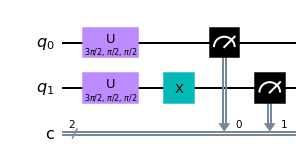

In [8]:
multi_qubit_a().draw(output='mpl')

In [9]:
backend = BasicAer.get_backend("statevector_simulator")
qc = multi_qubit_a()
qc.remove_final_measurements()
ket = Statevector.from_instruction(qc)
array_to_latex(ket, pretext="\\text{Circuit Statevector} = ")

<IPython.core.display.Math object>

In [11]:
def testNoInitializations_1a():
    ops = multi_qubit_a().count_ops()
    try:
        find_z = ops['initialize']
    except KeyError:
        return True
    else:
        return False
    
testNoInitializations_1a()

True

In [16]:
def testMeasurements_1a():
    ops = multi_qubit_a().count_ops()
    return ops['measure'] == 2

testMeasurements_1a()

True

In [17]:
def testAmplitudes_1a():
    return Statevector([-1j/2, -1/2, 1/2, -1j/2]).equiv(ket)

testAmplitudes_1a()

True

#### Task 2 (2A, 2B) - Beat the Oracle

Build a circuit that can figure out what gate the oracle returns. Fill in `undo_oracle_a` and `undo_oracle_b` with a circuit `qc_undo` that returns the corresponding basis state. 

#### Task 2A
Given an oracle that promises to return I or Z

#### Task 2b 
Given an oracle that promises to return I, X, Y, or Z

In [41]:
def gate_oracle_a(qc, qubit):
    r = random.uniform(0, 1)
    if r > 0.5:
        qc.I(qubit)
    else:
        qc.Z(qubit)
    return qc

def gate_oracle_b(qc):
    r = random.uniform(0, 1)
    if r < 0.25:
        qc.i(0)
        qc.i(1)
    elif r < 0.5:
        qc.x(0)
        qc.x(1)
    elif r < 0.75:
        qc.y(0)
        qc.y(1)
    else:
        qc.z(0)
        qc.z(1)
    return qc

In [85]:
# def undo_circuit_a():
#     qc_undo = None
#     # BEGIN SOLUTION
#     qc_undo.h(0)
#     # END SOLUTION
    
#     # BEGIN SOLUTION
#     qc_undo.h(0)
#     # END SOLUTION
#     return qc_undo

def undo_circuit_b():
    qc = QuantumCircuit(2,2)
    # solution: I:00, Z:01, X:10, Y:11
    qc.h(0)
    qc = gate_oracle_b(qc)
    qc.h(0)
    qc.measure(0,0)
    qc.measure(1,1)
    qc.reverse_bits()
    return qc

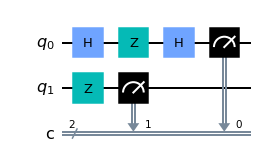

In [86]:
qc = undo_circuit_b()
qc.draw(output='mpl')

In [87]:
qc.remove_final_measurements()
ket = Statevector.from_instruction(qc)
array_to_latex(ket, pretext="\\text{Circuit Statevector} = ")

<IPython.core.display.Math object>

## Conclusion
Any finals thoughts/summary go here...

### Extension Ideas
1. Solve the twin prime conjecture
2. Count down from infinity
3. etc...